In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r"raw.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=['math_score'])
y = df['math_score']

In [4]:
num_col = X.select_dtypes(include=['int', 'float']).columns.tolist()

cat_col = X.select_dtypes(exclude=['int', 'float']).columns.tolist()


ordinal_cols = ["parental_level_of_education"]

onehot_cols = [col for col in cat_col if col not in ordinal_cols]

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [6]:
num_pipe = Pipeline(steps=[
    ('scale', StandardScaler())
])

onehot_pipe = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

ordinal_pipe = Pipeline(steps=[
    ('ordinal', OrdinalEncoder()),
    ('scaling', StandardScaler())
])


ct1 = ColumnTransformer(transformers=[
    ('numerical', num_pipe, num_col),
    ('onehot', onehot_pipe, onehot_cols),
    ('ordinal', ordinal_pipe, ordinal_cols)
])


X_transformed = ct1.fit_transform(X)

# Get new feature names directly
new_feature_names = ct1.get_feature_names_out()

pd.DataFrame(X_transformed, columns=new_feature_names)

,numerical__reading_score,numerical__writing_score,onehot__gender_male,onehot__race_ethnicity_group B,onehot__race_ethnicity_group C,onehot__race_ethnicity_group D,onehot__race_ethnicity_group E,onehot__lunch_standard,onehot__test_preparation_course_none,ordinal__parental_level_of_education
0,0.193999,0.391492,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.812640
1,1.427476,1.313269,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.827953
2,1.770109,1.642475,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.281088
3,-0.833899,-1.583744,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.359505
4,0.605158,0.457333,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.827953
...,...,...,...,...,...,...,...,...,...,...
995,2.044215,1.774157,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.281088
996,-0.970952,-0.859491,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.265776
997,0.125472,-0.201079,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.265776
998,0.605158,0.589015,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.827953


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet


In [24]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)

coef = pd.Series(lasso.coef_)
print("Selected Features (non-zero coefficients):")
print(coef[coef != 0])

Selected Features (non-zero coefficients):
0     4.282919
1     9.723626
2    12.376795
4    -0.229623
6     4.270348
7     3.418804
8     2.431025
9     0.208484
dtype: float64


In [25]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Coefficients
coef = pd.Series(ridge.coef_)
print("Ridge Coefficients:")
print(coef)

Ridge Coefficients:
0     3.840598
1    10.430752
2    12.928422
3     0.336428
4    -0.666919
5    -0.656637
6     4.783242
7     3.649339
8     3.147825
9     0.347842
dtype: float64


In [26]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.7)  # l1_ratio: balance between L1 and L2
elastic.fit(X_train, y_train)

# Coefficients
coef = pd.Series(elastic.coef_)
print("Selected Features (non-zero coefficients):")
print(coef[coef != 0])

Selected Features (non-zero coefficients):
0     5.643664
1     7.863680
2    10.722280
4    -0.595655
5    -0.096708
6     3.483775
7     3.487690
8     1.740642
9     0.145503
dtype: float64


In [27]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print(lasso_cv.alpha_)

0.012116745282397815


In [32]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)  # Must fit first!

feature_names = new_feature_names

# Feature importance
importance = pd.Series(tree.feature_importances_, index=feature_names)
importance = importance.sort_values(ascending=False)
print("Decision Tree Feature Importances:")
print(importance)

# Optional: select top features
top_features = importance[importance > 0.05].index.tolist()
print("Selected top features:", top_features)

Decision Tree Feature Importances:
numerical__reading_score                0.502462
numerical__writing_score                0.272431
onehot__gender_male                     0.139620
ordinal__parental_level_of_education    0.024983
onehot__lunch_standard                  0.016082
onehot__test_preparation_course_none    0.012851
onehot__race_ethnicity_group E          0.009873
onehot__race_ethnicity_group C          0.008408
onehot__race_ethnicity_group D          0.007115
onehot__race_ethnicity_group B          0.006175
dtype: float64
Selected top features: ['numerical__reading_score', 'numerical__writing_score', 'onehot__gender_male']


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

importance = pd.Series(rf.feature_importances_, index=feature_names)
importance = importance.sort_values(ascending=False)
print("Random Forest Feature Importances:")
print(importance)

top_features = importance[importance > 0.05].index.tolist()
print("Selected top features:", top_features)

Random Forest Feature Importances:
numerical__reading_score                0.567148
numerical__writing_score                0.233287
onehot__gender_male                     0.120517
ordinal__parental_level_of_education    0.022006
onehot__lunch_standard                  0.015975
onehot__test_preparation_course_none    0.011925
onehot__race_ethnicity_group E          0.010288
onehot__race_ethnicity_group C          0.007453
onehot__race_ethnicity_group D          0.005813
onehot__race_ethnicity_group B          0.005587
dtype: float64
Selected top features: ['numerical__reading_score', 'numerical__writing_score', 'onehot__gender_male']


In [36]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

importance = pd.Series(xgb.feature_importances_, index=feature_names)
importance = importance.sort_values(ascending=False)
print("XGBoost Feature Importances:")
print(importance)

top_features = importance[importance > 0.05].index.tolist()
print("Selected top features:", top_features)

XGBoost Feature Importances:
onehot__gender_male                     0.414399
numerical__reading_score                0.225342
numerical__writing_score                0.129706
onehot__race_ethnicity_group E          0.062247
onehot__lunch_standard                  0.054259
onehot__test_preparation_course_none    0.042890
ordinal__parental_level_of_education    0.020928
onehot__race_ethnicity_group C          0.020393
onehot__race_ethnicity_group B          0.016162
onehot__race_ethnicity_group D          0.013674
dtype: float32
Selected top features: ['onehot__gender_male', 'numerical__reading_score', 'numerical__writing_score', 'onehot__race_ethnicity_group E', 'onehot__lunch_standard']


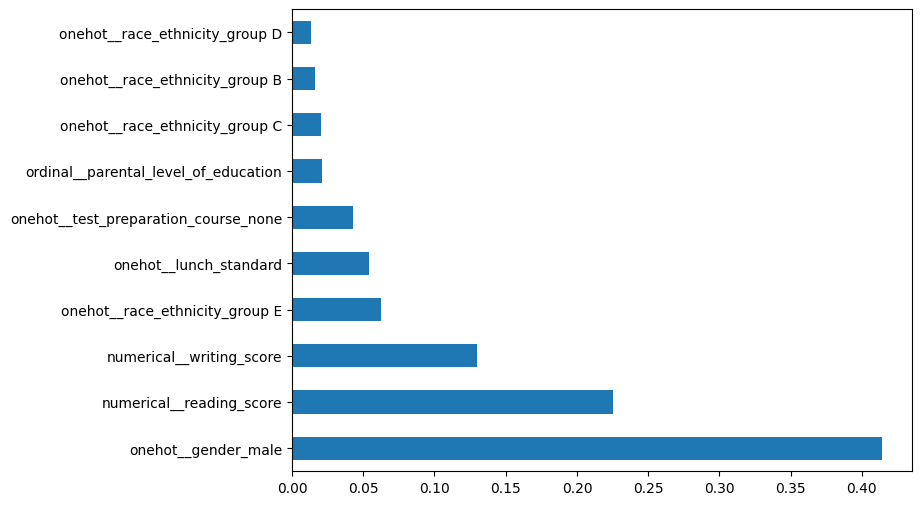

In [41]:
import matplotlib.pyplot as plt

importance.plot(kind='barh', figsize=(8,6))
plt.show()